<a href="https://colab.research.google.com/github/ShaniYamin/Fashion-mnist-NN-pytorch/blob/main/Fashion_mnist_DL_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Part 2 - Basics of deep learning

---
<br>

### Names:
Student 1:Shani Yamin 
<br>
Student 2:Noam Meir 

## Fashion MNIST with Pytorch
Fashion MNIST dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://i.postimg.cc/RVVCnL8w/mnist-fa-torch.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

<br>

# Goodluck!

# Neural Network with Pytorch part 1 (Binary Classification)

## Import Libraries

In [ ]:
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


## Load Dataset

(28, 28)


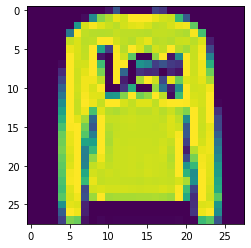

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(X_test[1].shape)
plt.imshow(X_test[1])
plt.show()

In [ ]:
# print(len(trainSet.targets))

## Data preprocessing

### Feature scaling

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

Showing the dataset

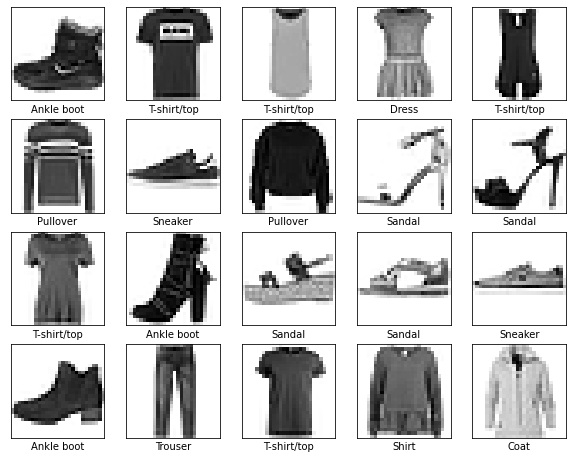

In [ ]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    # print(X_train.shape)
    plt.xlabel(class_names[y_train[i]])
plt.show()

### Select two classes

In [ ]:
X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)
y_train=y_train.reshape(1,60000)
y_test=y_test.reshape(1,10000)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(1, 60000)
(1, 10000)


Creating binary dataset for our labels

In [ ]:
#TODO: select two classes (for example 2-Pullover and 4-Coat)
label0=0
label1=3
trainLabels=[]
testLabels=[]
trainPxl=[]
testPxl=[]
j=0
for i, value in enumerate(y_train[0]):
  if value==label0 or value ==label1:
    if value==label0:
      trainLabels.append(0)
    else:
      trainLabels.append(1)
    row=X_train[i,:]
    trainPxl.append(row)

trainPxl=np.asarray(trainPxl)
print(trainPxl.shape)
trainLabels=np.asarray(trainLabels).reshape(len(trainLabels),1)
print(trainLabels.shape)


for i, value in enumerate(y_test[0]):
  if value==label0 or value ==label1:
    if value==label0:
      testLabels.append(0.0)
    else:
      testLabels.append(1.0)
    row=X_test[i,:]
    testPxl.append(row)

testPxl=np.asarray(testPxl)
print(testPxl.shape)
testLabels=np.asarray(testLabels).reshape(len(testLabels),1)
print(testLabels.shape)
testPxl=testPxl.reshape(len(testPxl),784)
testPxl=torch.tensor(testPxl,dtype=torch.float)
testLabels=torch.tensor(testLabels,dtype=torch.float)
testSet=torch.utils.data.TensorDataset(testPxl,testLabels)
print("size: ",testSet.tensors[0].shape)

(12000, 784)
(12000, 1)
(2000, 784)
(2000, 1)
size:  torch.Size([2000, 784])


Use Pytorch data tools to preprocessed the row data<br>
Read about pytorch data tools here: https://pytorch.org/docs/stable/data.html

Creating train and validation sets 

In [ ]:
trainPxl=trainPxl.reshape(len(trainPxl),784)
trainPxl=torch.tensor(trainPxl,dtype=torch.float)
trainLabels=torch.tensor(trainLabels,dtype=torch.float)
x_train,x_valid,Y_train,Y_valid=train_test_split(trainPxl,trainLabels,test_size=0.2,random_state=13)
print(Y_train.shape)
print(Y_valid.shape)
trainSet=torch.utils.data.TensorDataset(x_train,Y_train)
validSet=torch.utils.data.TensorDataset(x_valid,Y_valid)


torch.Size([9600, 1])
torch.Size([2400, 1])


Define the dataloader

In [ ]:
from torch.utils.data import DataLoader, RandomSampler
 # WRITE YOUR CODE HERE
train_loader=DataLoader(dataset=trainSet, batch_size=64)
valid_loader=DataLoader(dataset=validSet, batch_size=64)
test_loader=DataLoader(dataset=testSet,batch_size=64)

### Build the network layers
Read about Fully connected layers in pytorch here: https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

###HyperParameters

In [ ]:
input_size=784
learning_rate=0.001

Define the fully connected neural network

In [ ]:
from torch import nn
import torch.nn.functional as F

class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1=nn.Linear(784,32)
    self.de=nn.Dropout(0.5)
    self.fc2=nn.Linear(32,1)
    self.relu = nn.ReLU()
    # WRITE YOUR CODE HERE


  def forward(self, x):
    out=self.fc1(x)
    out=self.de(out)
    out=self.relu(out)
    out=self.fc2(out)
    out=F.sigmoid(out)
    return out

Create the model

In [ ]:
model = NeuralNetwork().to(device)
# WRITE YOUR CODE HERE
print(model)

NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (de): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
)


### Build the Optimizer
Read about the Optimizer here: https://pytorch.org/docs/stable/optim.html

Set the optimizer

In [ ]:
from torch import optim
optimizer=optim.Adam(model.parameters(),lr=learning_rate)

### Loss Function
Read about Loss here: https://pytorch.org/docs/stable/optim.html

In [ ]:
loss_func =nn.BCELoss() 
# WRITE YOUR CODE HERE

### Training
Train your model, Don't forget to store the "loss" and "Accuracy" while training, you will have to show them later.<br>
Read about Loss here: https://pytorch.org/tutorials/beginner/introyt/trainingyt.html

checking the train_loader, that has the good data

In [ ]:
def get_accuracy(scores, targets):
  binary_scores = scores>0.5
  accuracy_vector = binary_scores == targets
  return accuracy_vector.sum() / len(accuracy_vector)

Train the model

In [ ]:
number_of_epochs = 50

acc_for_epoch_train=[]
max_acc_valid=0
loss_for_epoch_train=[]
acc_for_epoch_valid=[]
loss_for_epoch_valid=[]
for epoch in range(number_of_epochs): 
  accuracy_per_batch_train = []
  accuracy_per_batch_valid = []
  running_loss_train=0.0
  running_loss_valid=0.0
  model.train()
  for idx,(data,targets) in enumerate(train_loader):
    data = data.to(device=device)
    targets = targets.to(device=device)   
    scores=model(data)
    accuracy = get_accuracy(scores,targets).detach().cpu().numpy()
    accuracy_per_batch_train.append(accuracy)
    loss_train=loss_func(scores,targets)
    running_loss_train += loss_train.item()
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step() 
  running_loss_train/=len(train_loader)
  model.eval()
  for idx,(data,targets) in enumerate(valid_loader):
    data = data.to(device=device)
    targets = targets.to(device=device)   
    scores=model(data)
    accuracy = get_accuracy(scores,targets).detach().cpu().numpy()
    accuracy_per_batch_valid.append(accuracy)
    loss_valid=loss_func(scores,targets)
    running_loss_valid += loss_valid.item()
  running_loss_valid/=len(valid_loader) 
  current_epoch_accuracy_train=np.mean(accuracy_per_batch_train)
  current_epoch_accuracy_valid=np.mean(accuracy_per_batch_valid)
  acc_for_epoch_train.append(current_epoch_accuracy_train)
  loss_for_epoch_train.append(running_loss_train)
  acc_for_epoch_valid.append(current_epoch_accuracy_valid)
  loss_for_epoch_valid.append(running_loss_valid)
  
  print(f" train epoch num {epoch} loss: {running_loss_train:.6f} acc {current_epoch_accuracy_train*100:.2f}%")
  print(f" valid epoch num {epoch} loss: {running_loss_valid:.6f} acc {current_epoch_accuracy_valid*100:.2f}%")
print(f"Best validation Accuracy {np.max(acc_for_epoch_valid)}")
  # WRITE YOUR CODE HERE

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


 train epoch num 0 loss: 0.299303 acc 88.84%
 valid epoch num 0 loss: 0.180117 acc 93.26%
 train epoch num 1 loss: 0.207017 acc 92.03%
 valid epoch num 1 loss: 0.155927 acc 94.04%
 train epoch num 2 loss: 0.189270 acc 92.87%
 valid epoch num 2 loss: 0.152260 acc 94.37%
 train epoch num 3 loss: 0.175545 acc 93.42%
 valid epoch num 3 loss: 0.139090 acc 94.20%
 train epoch num 4 loss: 0.165230 acc 93.77%
 valid epoch num 4 loss: 0.138178 acc 94.41%
 train epoch num 5 loss: 0.158105 acc 94.34%
 valid epoch num 5 loss: 0.131915 acc 94.82%
 train epoch num 6 loss: 0.150872 acc 94.55%
 valid epoch num 6 loss: 0.130576 acc 94.37%
 train epoch num 7 loss: 0.146037 acc 94.53%
 valid epoch num 7 loss: 0.130421 acc 94.74%
 train epoch num 8 loss: 0.144032 acc 94.59%
 valid epoch num 8 loss: 0.127519 acc 94.78%
 train epoch num 9 loss: 0.151070 acc 94.91%
 valid epoch num 9 loss: 0.123831 acc 94.94%
 train epoch num 10 loss: 0.139638 acc 95.09%
 valid epoch num 10 loss: 0.126147 acc 94.65%
 train e

### Save Trained model (weights)
Read about Save and load models in pytorch here: [https://pytorch.org/tutorials/beginner/saving_loading_models.html](https://pytorch.org/tutorials/beginner/saving_loading_models.html)


In [ ]:
# SAVE THE TRAINED MODEL
PATH='model.pth'
torch.save(model, PATH)

#LOAD THE WEIGHTS
model = torch.load(PATH)

### Loss and Accuracy Visualization
Show  on plot the loss during training

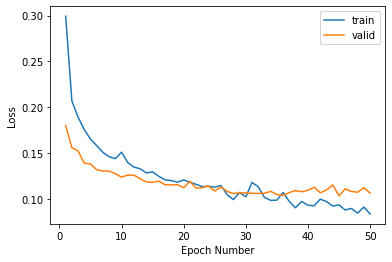

In [ ]:
import matplotlib.pyplot as plt
# WRITE YOUR CODE HERE

epoch_list=np.arange(1,number_of_epochs+1)
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(epoch_list, loss_for_epoch_train,label="train")
plt.plot(epoch_list, loss_for_epoch_valid,label="valid")
plt.legend()

Show  on plot the accuracy during training

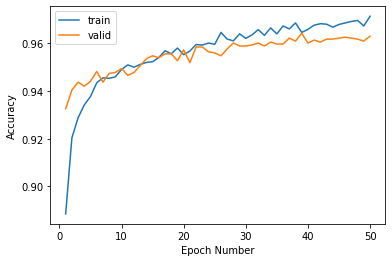

In [ ]:

import matplotlib.pyplot as plt
# WRITE YOUR CODE HERE

epoch_list=np.arange(1,number_of_epochs+1)
plt.xlabel('Epoch Number')
plt.ylabel("Accuracy")
plt.plot(epoch_list, acc_for_epoch_train,label="train")
plt.plot(epoch_list, acc_for_epoch_valid,label="valid")
plt.legend()

### Test
Test your model (Show accuracy by comparing the prediction VS the test label)

In [ ]:
from sklearn.metrics import accuracy_score
model = torch.load(PATH)
model.eval()
accuracy_per_batch_test=[]
prediction=[]
total_predictions_test=0
correct_predictions_test=0
for idx,(data,targets) in enumerate(test_loader):
    data = data.to(device=device)
    model = model.to(device=device) 
    targets=targets.to(device=device)  
    scores=model(data)
    preds= scores>=0.5
    preds=list(preds.cpu().numpy())
    accuracy = get_accuracy(scores,targets).detach().cpu().numpy()
    accuracy_per_batch_test.append(accuracy)
    prediction.extend(preds)
current_epoch_accuracy_test=np.mean(accuracy_per_batch_test)
print('Test Acc ', current_epoch_accuracy_test*100,'%')

Test Acc  95.8984375 %


/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


### Model Evaluation
Show the model evaluation by presenting the confusion metrix in a representative way<br>
Read about confusion metrix visualization here: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

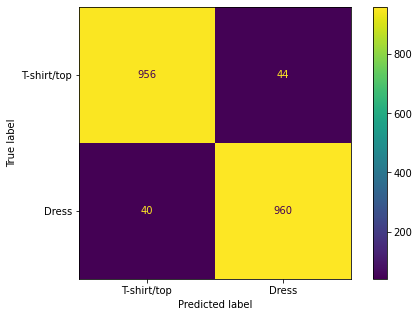

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools
# WRITE YOUR CODE HERE
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(testLabels,prediction), 
    display_labels=[class_names[label0],class_names[label1]])
cmp.plot(ax=ax);

In [ ]:
from sklearn.metrics import classification_report
print(testSet.tensors[1].shape)
print(classification_report(testSet.tensors[1], prediction, labels=[0,1]))

torch.Size([2000, 1])
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1000
           1       0.96      0.96      0.96      1000

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



---
<br>


# Neural Network with Pytorch part 2 (Multiclass Classification)

## Import Libraries

In [ ]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from torch import optim
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


## Load Dataset

(28, 28)


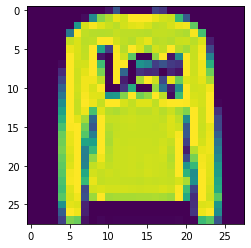

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(X_test[1].shape)
plt.imshow(X_test[1])
plt.show()

### The rest you will have to create yourself...

## Models

### Base Model

Showing the dataset

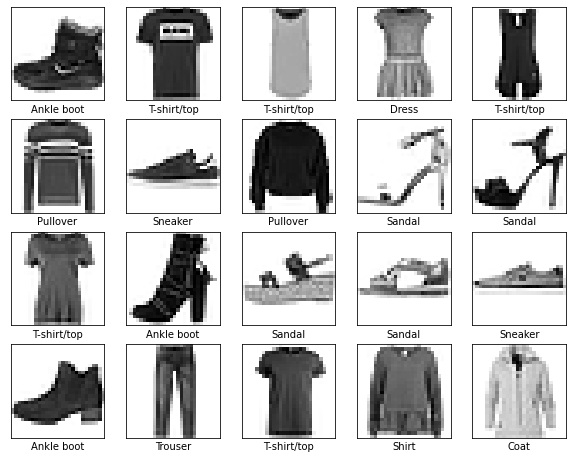

In [ ]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
print(X_train.shape)
y_train=y_train.reshape(len(y_train),1)
print(y_train.shape)
print(X_test.shape)
y_test=y_test.reshape(len(y_test),1)
print(y_test.shape)

(60000, 28, 28)
(60000, 1)
(10000, 28, 28)
(10000, 1)


Create dataset for the data

In [ ]:
X_train, X_test =X_train.reshape(len(X_train),784),X_test.reshape(len(X_test),784)
X_train ,y_train=torch.tensor(X_train,dtype=torch.float),torch.tensor(y_train,dtype=torch.float)
trainSet=torch.utils.data.TensorDataset(X_train,y_train)
X_test ,y_test=torch.tensor(X_test,dtype=torch.float),torch.tensor(y_test,dtype=torch.float)
testSet=torch.utils.data.TensorDataset(X_test,y_test)
print(testSet.tensors[1].shape)

torch.Size([10000, 1])


Creating train and validation sets 

In [ ]:

x_train,x_valid,Y_train,Y_valid=train_test_split(X_train,y_train,test_size=0.2,random_state=13)
print(Y_train.shape)
print(Y_valid.shape)
trainSet_multi=torch.utils.data.TensorDataset(x_train,Y_train)
validSet_multi=torch.utils.data.TensorDataset(x_valid,Y_valid)
testSet_multi=torch.utils.data.TensorDataset(X_test,y_test)

torch.Size([48000, 1])
torch.Size([12000, 1])


Define the dataloader

In [ ]:
from torch.utils.data import DataLoader

train_loader_multi=DataLoader(dataset=trainSet_multi,batch_size=100,shuffle=True)
valid_loader_multi=DataLoader(dataset=validSet_multi,batch_size=100,shuffle=True)
test_loader_multi=DataLoader(dataset=testSet_multi,batch_size=100,shuffle=True)


 Define the fully connected neural network

In [ ]:
from torch import nn
import torch.nn.functional as F

class NeuralNetwork1(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1=nn.Linear(784,128)
    self.de=nn.Dropout(0.5)
    self.fc2=nn.Linear(128,32)
    self.de=nn.Dropout(0.5)
    self.fc3=nn.Linear(32,10)


  def forward(self, x):
    out=F.relu(self.fc1(x))
    out=self.de(out)
    out=F.relu(self.fc2(out))
    out=self.de(out)
    out=self.fc3(out)
    return out

  def predict(self,X_test):
    data = X_test.to(device)
    outputs = self(data)           
    _,predicted = torch.max(outputs.data,1)
    print(predicted)      
            
    return predicted


In [ ]:
model_multi= NeuralNetwork1().to(device)

Create the model and set the optimizer



In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer = optim.SGD(model_multi.parameters(), lr=0.0005)

Train the model

In [ ]:
number_of_epochs = 50
acc_for_epoch_train_multi=[]
loss_for_epoch_train_multi=[]
acc_for_epoch_valid_multi=[]
loss_for_epoch_valid_multi=[]
for epoch in range(number_of_epochs): 
  running_loss_train_multi=0.0
  running_loss_valid_multi=0.0
  total_predictions_train = 0
  correct_predictions_train = 0 
  total_predictions_valid = 0.0
  correct_predictions_valid = 0.0
  model_multi.train()
  for idx,(data,targets) in enumerate(train_loader_multi):
    data = data.to(device=device)
    targets = targets.to(device=device) 
    scores=model_multi(data)
    
    targets=targets.reshape(len(targets)).type(torch.LongTensor).to(device)
    loss_train_multi=criterion(scores,targets)
    running_loss_train_multi += loss_train_multi.item()
    _, predicted = torch.max(scores.data, 1)
    total_predictions_train += targets.size(0)
    correct_predictions_train += (predicted == targets).sum().item()

    optimizer.zero_grad()
    loss_train_multi.backward()
    optimizer.step() 
  acc_train = (correct_predictions_train/total_predictions_train)* 100.0
  running_loss_train_multi/=len(train_loader_multi)
  model_multi.eval()
  for idx,(data,targets) in enumerate(valid_loader_multi):
    data = data.to(device=device)
    targets = targets.to(device=device)   
    scores=model_multi(data)
    targets=targets.reshape(len(targets)).type(torch.LongTensor).to(device)
    loss_valid_multi=criterion(scores,targets)
    running_loss_valid_multi += loss_valid_multi.item()
    _, predicted = torch.max(scores.data, 1)
    total_predictions_valid += targets.size(0)
    correct_predictions_valid += (predicted == targets).sum().item()
  acc_valid = (correct_predictions_valid/total_predictions_valid)* 100.0
  running_loss_valid_multi/=len(valid_loader_multi) 
  acc_for_epoch_train_multi.append(acc_train)
  loss_for_epoch_train_multi.append(running_loss_train_multi)
  acc_for_epoch_valid_multi.append(acc_valid)
  loss_for_epoch_valid_multi.append(running_loss_valid_multi)
  
  print(f" train epoch num {epoch} loss: {running_loss_train_multi:.6f} acc {acc_train:.2f}%")
  print(f" valid epoch num {epoch} loss: {running_loss_valid_multi:.6f} acc {acc_valid:.2f}%")
  # WRITE YOUR CODE HERE
print(f"Best validatiion accuracy {np.max(acc_for_epoch_valid_multi)}")

 train epoch num 0 loss: 2.290923 acc 27.08%
 valid epoch num 0 loss: 1.277190 acc 59.14%
 train epoch num 1 loss: 1.595468 acc 42.26%
 valid epoch num 1 loss: 1.081148 acc 65.72%
 train epoch num 2 loss: 1.430358 acc 49.66%
 valid epoch num 2 loss: 0.997404 acc 66.88%
 train epoch num 3 loss: 1.329739 acc 54.54%
 valid epoch num 3 loss: 0.865806 acc 70.92%
 train epoch num 4 loss: 1.251956 acc 57.44%
 valid epoch num 4 loss: 0.841205 acc 71.75%
 train epoch num 5 loss: 1.183930 acc 59.53%
 valid epoch num 5 loss: 0.762586 acc 72.06%
 train epoch num 6 loss: 1.142831 acc 60.81%
 valid epoch num 6 loss: 0.733043 acc 72.76%
 train epoch num 7 loss: 1.108662 acc 61.90%
 valid epoch num 7 loss: 0.704879 acc 73.47%
 train epoch num 8 loss: 1.075418 acc 62.73%
 valid epoch num 8 loss: 0.689473 acc 74.13%
 train epoch num 9 loss: 1.048965 acc 63.10%
 valid epoch num 9 loss: 0.670771 acc 74.26%
 train epoch num 10 loss: 1.018448 acc 63.68%
 valid epoch num 10 loss: 0.666081 acc 75.02%
 train e

Save Trained model (weights)

In [ ]:
# SAVE THE TRAINED MODEL
PATH='model_multi.pth'
torch.save(model_multi, PATH)

Show on plot the loss during training

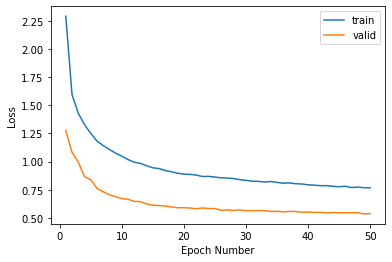

In [ ]:
import matplotlib.pyplot as plt
# WRITE YOUR CODE HERE

epoch_list=np.arange(1,number_of_epochs+1)
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(epoch_list, loss_for_epoch_train_multi,label="train")
plt.plot(epoch_list, loss_for_epoch_valid_multi,label="valid")
plt.legend()

Show on plot the accuracy during training

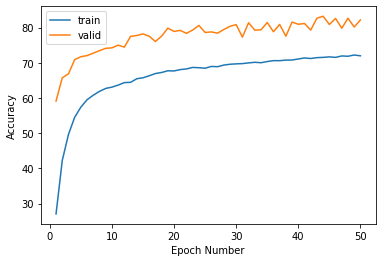

In [ ]:
import matplotlib.pyplot as plt
# WRITE YOUR CODE HERE

epoch_list=np.arange(1,number_of_epochs+1)
plt.xlabel('Epoch Number')
plt.ylabel("Accuracy")
plt.plot(epoch_list, acc_for_epoch_train_multi,label="train")
plt.plot(epoch_list, acc_for_epoch_valid_multi,label="valid")
plt.legend()

Test the model

In [ ]:
from sklearn.metrics import accuracy_score
y_pred2 = model_multi.predict(X_test).cpu()
# WRITE YOUR CODE HERE
acc_test = accuracy_score(y_test,y_pred2)
print('Test Acc ', acc_test*100,'%')

tensor([9, 4, 1,  ..., 8, 1, 5])
Test Acc  81.47999999999999 %


In [ ]:
from sklearn.metrics import classification_report
target_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneacker', 'Beg', 'Ankel Boot']
print(classification_report(y_test, y_pred2, target_names=target_names))

              precision    recall  f1-score   support

 T-shirt/top       0.74      0.85      0.79      1000
     Trouser       0.97      0.95      0.96      1000
    Pullover       0.63      0.49      0.55      1000
       Dress       0.86      0.84      0.85      1000
        Coat       0.59      0.77      0.67      1000
      Sandal       0.96      0.94      0.95      1000
       Shirt       0.60      0.46      0.52      1000
    Sneacker       0.91      0.94      0.93      1000
         Beg       0.95      0.95      0.95      1000
  Ankel Boot       0.95      0.94      0.94      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



### Experiment number 1

Define the fully connected neural network

In [ ]:
class NeuralNetworkEx1(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1=nn.Linear(784,128)
    self.de=nn.Dropout(0.5)
    self.fc2=nn.Linear(128,32)
    self.de=nn.Dropout(0.5)
    self.fc3=nn.Linear(32,10)


  def forward(self, x):
    out=F.relu(self.fc1(x))
    out=self.de(out)
    out=F.relu(self.fc2(out))
    out=self.de(out)
    out=self.fc3(out)
    return out

  def predict(self,X_test):
    data = X_test.to(device)
    outputs = self(data)           
    _,predicted = torch.max(outputs.data,1)
    print(predicted)      
            
    return predicted

In [ ]:
model_multi_Ex1= NeuralNetworkEx1().to(device)

Create the model and set the optimizer

In [ ]:
criterion_Ex1=nn.CrossEntropyLoss()
optimizer_Ex1 = optim.SGD(model_multi_Ex1.parameters(), lr=0.005)

In [ ]:
number_of_epochs = 50
acc_for_epoch_train_multi_Ex1=[]
loss_for_epoch_train_multi_Ex1=[]
acc_for_epoch_valid_multi_Ex1=[]
loss_for_epoch_valid_multi_Ex1=[]
for epoch in range(number_of_epochs): 
  running_loss_train_multi_Ex1=0.0
  running_loss_valid_multi_Ex1=0.0
  total_predictions_train_Ex1 = 0
  correct_predictions_train_Ex1 = 0 
  total_predictions_valid_Ex1 = 0.0
  correct_predictions_valid_Ex1 = 0.0
  model_multi_Ex1.train()
  for idx,(data,targets) in enumerate(train_loader_multi):
    data = data.to(device=device)
    targets = targets.to(device=device) 
    scores=model_multi_Ex1(data)
    targets=targets.reshape(len(targets)).type(torch.LongTensor).to(device)
    loss_train_multi_Ex1=criterion_Ex1(scores,targets)
    running_loss_train_multi_Ex1 += loss_train_multi_Ex1.item()
    _, predicted = torch.max(scores.data, 1)
    total_predictions_train_Ex1 += targets.size(0)
    correct_predictions_train_Ex1 += (predicted == targets).sum().item()
    optimizer_Ex1.zero_grad()
    loss_train_multi_Ex1.backward()
    optimizer_Ex1.step() 
  acc_train_Ex1 = (correct_predictions_train_Ex1/total_predictions_train_Ex1)* 100.0
  running_loss_train_multi_Ex1/=len(train_loader_multi)
  model_multi_Ex1.eval()
  for idx,(data,targets) in enumerate(valid_loader_multi):
    data = data.to(device=device)
    targets = targets.to(device=device)   
    scores=model_multi_Ex1(data)
    targets=targets.reshape(len(targets)).type(torch.LongTensor).to(device)
    loss_valid_multi_Ex1=criterion_Ex1(scores,targets)
    running_loss_valid_multi_Ex1 += loss_valid_multi_Ex1.item()
    _, predicted = torch.max(scores.data, 1)
    total_predictions_valid_Ex1 += targets.size(0)
    correct_predictions_valid_Ex1 += (predicted == targets).sum().item()
  acc_valid_Ex1 = (correct_predictions_valid_Ex1/total_predictions_valid_Ex1)* 100.0
  running_loss_valid_multi_Ex1/=len(valid_loader_multi) 
  acc_for_epoch_train_multi_Ex1.append(acc_train_Ex1)
  loss_for_epoch_train_multi_Ex1.append(running_loss_train_multi_Ex1)
  acc_for_epoch_valid_multi_Ex1.append(acc_valid_Ex1)
  loss_for_epoch_valid_multi_Ex1.append(running_loss_valid_multi_Ex1)
  
  print(f" train epoch num {epoch} loss: {running_loss_train_multi_Ex1:.6f} acc {acc_train_Ex1:.2f}%")
  print(f" valid epoch num {epoch} loss: {running_loss_valid_multi_Ex1:.6f} acc {acc_valid_Ex1:.2f}%")
  # WRITE YOUR CODE HERE
print(f"Best Validation Accuracy {np.max(acc_for_epoch_valid_multi_Ex1)}")

 train epoch num 0 loss: 2.457260 acc 9.89%
 valid epoch num 0 loss: 2.306442 acc 10.49%
 train epoch num 1 loss: 2.307426 acc 9.88%
 valid epoch num 1 loss: 2.304940 acc 10.49%
 train epoch num 2 loss: 2.305281 acc 9.90%
 valid epoch num 2 loss: 2.304015 acc 9.90%
 train epoch num 3 loss: 2.304513 acc 10.02%
 valid epoch num 3 loss: 2.303463 acc 9.90%
 train epoch num 4 loss: 2.304186 acc 10.03%
 valid epoch num 4 loss: 2.303132 acc 9.90%
 train epoch num 5 loss: 2.303249 acc 10.03%
 valid epoch num 5 loss: 2.302943 acc 9.90%
 train epoch num 6 loss: 2.302932 acc 10.04%
 valid epoch num 6 loss: 2.302838 acc 9.90%
 train epoch num 7 loss: 2.302903 acc 10.04%
 valid epoch num 7 loss: 2.302778 acc 9.90%
 train epoch num 8 loss: 2.302402 acc 9.96%
 valid epoch num 8 loss: 2.302746 acc 9.90%
 train epoch num 9 loss: 2.302015 acc 10.07%
 valid epoch num 9 loss: 2.302733 acc 9.90%
 train epoch num 10 loss: 2.185820 acc 15.61%
 valid epoch num 10 loss: 2.032129 acc 23.33%
 train epoch num 11 

Show on plot the loss during training

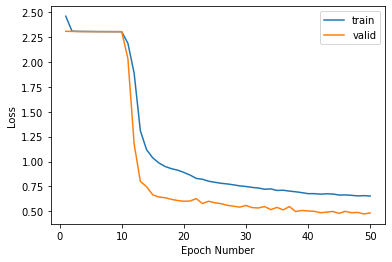

In [ ]:
import matplotlib.pyplot as plt
# WRITE YOUR CODE HERE
epoch_list=np.arange(1,number_of_epochs+1)
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(epoch_list, loss_for_epoch_train_multi_Ex1,label="train")
plt.plot(epoch_list, loss_for_epoch_valid_multi_Ex1,label="valid")
plt.legend()

Show on plot the accuracy during training

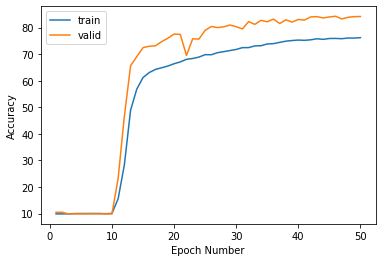

In [ ]:
import matplotlib.pyplot as plt
# WRITE YOUR CODE HERE
epoch_list=np.arange(1,number_of_epochs+1)
plt.xlabel('Epoch Number')
plt.ylabel("Accuracy")
plt.plot(epoch_list, acc_for_epoch_train_multi_Ex1,label="train")
plt.plot(epoch_list, acc_for_epoch_valid_multi_Ex1,label="valid")
plt.legend()

Test the model

In [ ]:
y_pred2 = model_multi_Ex1.predict(X_test).cpu()
# WRITE YOUR CODE HERE
acc_test_ex1 = accuracy_score(y_test,y_pred2)
print('Test Acc ', acc_test_ex1*100,'%')

tensor([9, 2, 1,  ..., 8, 1, 5])
Test Acc  84.11 %


In [ ]:
target_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneacker', 'Beg', 'Ankel Boot']
print(classification_report(y_test, y_pred2, target_names=target_names))

              precision    recall  f1-score   support

 T-shirt/top       0.77      0.81      0.79      1000
     Trouser       0.99      0.96      0.97      1000
    Pullover       0.64      0.84      0.72      1000
       Dress       0.79      0.90      0.84      1000
        Coat       0.78      0.69      0.73      1000
      Sandal       0.97      0.94      0.96      1000
       Shirt       0.70      0.43      0.53      1000
    Sneacker       0.94      0.91      0.92      1000
         Beg       0.95      0.96      0.96      1000
  Ankel Boot       0.90      0.98      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



### Experiment number 2

 Create the model and set the optimizer

In [ ]:
model_multi_Ex2= NeuralNetworkEx1().to(device)

In [ ]:
optimizer_Ex2 = optim.Adam(model_multi_Ex2.parameters(), lr=0.00005)

Train the model

In [ ]:
number_of_epochs = 100
acc_for_epoch_train_multi_Ex2=[]
loss_for_epoch_train_multi_Ex2=[]
acc_for_epoch_valid_multi_Ex2=[]
loss_for_epoch_valid_multi_Ex2=[]
for epoch in range(number_of_epochs): 
  running_loss_train_multi_Ex2=0.0
  running_loss_valid_multi_Ex2=0.0
  total_predictions_train_Ex2 = 0
  correct_predictions_train_Ex2 = 0 
  total_predictions_valid_Ex2 = 0.0
  correct_predictions_valid_Ex2 = 0.0
  model_multi_Ex2.train()
  for idx,(data,targets) in enumerate(train_loader_multi):
    data = data.to(device=device)
    targets = targets.to(device=device) 
    scores=model_multi_Ex2(data)
    targets=targets.reshape(len(targets)).type(torch.LongTensor).to(device)
    loss_train_multi_Ex2=criterion_Ex1(scores,targets)
    running_loss_train_multi_Ex2 += loss_train_multi_Ex2.item()
    _, predicted = torch.max(scores.data, 1)
    total_predictions_train_Ex2 += targets.size(0)
    correct_predictions_train_Ex2 += (predicted == targets).sum().item()
    optimizer_Ex2.zero_grad()
    loss_train_multi_Ex2.backward()
    optimizer_Ex2.step() 
  acc_train_Ex2 = (correct_predictions_train_Ex2/total_predictions_train_Ex2)* 100.0
  running_loss_train_multi_Ex2/=len(train_loader_multi)
  model_multi_Ex2.eval()
  for idx,(data,targets) in enumerate(valid_loader_multi):
    data = data.to(device=device)
    targets = targets.to(device=device)   
    scores=model_multi_Ex2(data)
    targets=targets.reshape(len(targets)).type(torch.LongTensor).to(device)
    loss_valid_multi_Ex2=criterion_Ex1(scores,targets)
    running_loss_valid_multi_Ex2 += loss_valid_multi_Ex2.item()
    _, predicted = torch.max(scores.data, 1)
    total_predictions_valid_Ex2 += targets.size(0)
    correct_predictions_valid_Ex2 += (predicted == targets).sum().item()
  acc_valid_Ex2 = (correct_predictions_valid_Ex2/total_predictions_valid_Ex2)* 100.0
  running_loss_valid_multi_Ex2/=len(valid_loader_multi) 
  acc_for_epoch_train_multi_Ex2.append(acc_train_Ex2)
  loss_for_epoch_train_multi_Ex2.append(running_loss_train_multi_Ex2)
  acc_for_epoch_valid_multi_Ex2.append(acc_valid_Ex2)
  loss_for_epoch_valid_multi_Ex2.append(running_loss_valid_multi_Ex2)
  
  print(f" train epoch num {epoch} loss: {running_loss_train_multi_Ex2:.6f} acc {acc_train_Ex2:.2f}%")
  print(f" valid epoch num {epoch} loss: {running_loss_valid_multi_Ex2:.6f} acc {acc_valid_Ex2:.2f}%")
  # WRITE YOUR CODE HERE
print(f"Best validation accuracy {np.max(acc_for_epoch_valid_multi_Ex2)}")

 train epoch num 0 loss: 3.940906 acc 24.09%
 valid epoch num 0 loss: 1.403129 acc 55.78%
 train epoch num 1 loss: 1.842820 acc 37.77%
 valid epoch num 1 loss: 1.153761 acc 68.31%
 train epoch num 2 loss: 1.573948 acc 47.35%
 valid epoch num 2 loss: 0.979114 acc 70.43%
 train epoch num 3 loss: 1.405332 acc 53.16%
 valid epoch num 3 loss: 0.898270 acc 72.72%
 train epoch num 4 loss: 1.294686 acc 56.77%
 valid epoch num 4 loss: 0.838362 acc 74.34%
 train epoch num 5 loss: 1.187533 acc 59.99%
 valid epoch num 5 loss: 0.755293 acc 75.62%
 train epoch num 6 loss: 1.115623 acc 62.09%
 valid epoch num 6 loss: 0.717801 acc 76.66%
 train epoch num 7 loss: 1.055809 acc 63.64%
 valid epoch num 7 loss: 0.679267 acc 77.03%
 train epoch num 8 loss: 1.007570 acc 64.86%
 valid epoch num 8 loss: 0.653921 acc 78.65%
 train epoch num 9 loss: 0.971873 acc 65.70%
 valid epoch num 9 loss: 0.629349 acc 79.28%
 train epoch num 10 loss: 0.920605 acc 67.12%
 valid epoch num 10 loss: 0.589666 acc 80.27%
 train e

Show on plot the loss during training

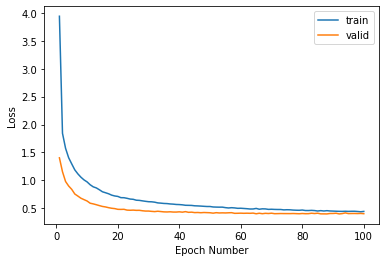

In [ ]:
import matplotlib.pyplot as plt
# WRITE YOUR CODE HERE

epoch_list=np.arange(1,number_of_epochs+1)
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(epoch_list, loss_for_epoch_train_multi_Ex2,label="train")
plt.plot(epoch_list, loss_for_epoch_valid_multi_Ex2,label="valid")
plt.legend()

Show on plot the accuracy during training

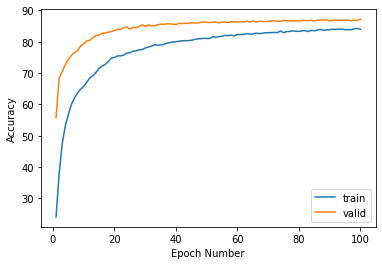

In [ ]:
import matplotlib.pyplot as plt
# WRITE YOUR CODE HERE

epoch_list=np.arange(1,number_of_epochs+1)
plt.xlabel('Epoch Number')
plt.ylabel("Accuracy")
plt.plot(epoch_list, acc_for_epoch_train_multi_Ex2,label="train")
plt.plot(epoch_list, acc_for_epoch_valid_multi_Ex2,label="valid")
plt.legend()

Test the model

In [ ]:
y_pred2_Ex2 = model_multi_Ex2.predict(X_test).cpu()
# WRITE YOUR CODE HERE
acc_test_Ex2 = accuracy_score(y_test,y_pred2_Ex2)
print('Test Acc ', acc_test_Ex2*100,'%')

tensor([9, 2, 1,  ..., 8, 1, 5])
Test Acc  86.6 %


In [ ]:
target_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneacker', 'Beg', 'Ankel Boot']
print(classification_report(y_test, y_pred2, target_names=target_names))

              precision    recall  f1-score   support

 T-shirt/top       0.77      0.81      0.79      1000
     Trouser       0.99      0.96      0.97      1000
    Pullover       0.64      0.84      0.72      1000
       Dress       0.79      0.90      0.84      1000
        Coat       0.78      0.69      0.73      1000
      Sandal       0.97      0.94      0.96      1000
       Shirt       0.70      0.43      0.53      1000
    Sneacker       0.94      0.91      0.92      1000
         Beg       0.95      0.96      0.96      1000
  Ankel Boot       0.90      0.98      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



## Test Environment (of part 2 only)
This part is meant to show the tester how your model is performing. Keep in mind that the only cells he is going to run are the cells below.<br>
(If there are libraries that need to be used please add their import. If there is a process that the data has to go through before it enters the model, don't forget to add it as well).

### Load trained model

In [ ]:
# SAVE THE TRAINED MODEL
torch.save(model_multi_Ex2.state_dict(), 'model_multi_Ex2.pth')

#LOAD THE WEIGHTS
model_multi_Ex2.load_state_dict(torch.load('model_multi_Ex2.pth'))

<All keys matched successfully>

### Single prediction
Let the tester examine your trained model on single predicttion test.<br>You will use the colab.file library to allow the tester to upload a single image of an item of clothing (28x28 image).<br>
Then build a function that takes this image, loads the weights of the trained model (If you haven't loaded it before) and prints a prediction.

In [ ]:
from numpy import load as load_npy
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

In [ ]:
# WRITE HERE THE TEST 
img_bag = np.load('Sandal_5.npy')
img1 = img_bag/255
img1 = img1.reshape(1,28*28)
img1 = torch.from_numpy(img1).type(torch.FloatTensor)
predicted_label = model_multi_Ex2.predict(img1)

In [ ]:
img_dress = np.load('Sneaker_7.npy')
img1 = img_dress/255
img1 = img1.reshape(1,28*28)
img1 = torch.from_numpy(img1).type(torch.FloatTensor)
predicted_label = model_multi_Ex2.predict(img1)

In [ ]:
img_dress = np.load('Dress_3.npy')
img1 = img_dress/255
img1 = img1.reshape(1,28*28)
img1 = torch.from_numpy(img1).type(torch.FloatTensor)
predicted_label = model_multi_Ex2.predict(img1)